In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yfin
yfin.pdr_override()

In [18]:
import yfinance as yf
data = yf.download('RELIANCE.NS', start='2017-01-01')
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,536.910645,539.882446,531.140320,537.455444,520.285400,3275674
2017-01-03,539.808167,543.349609,535.474243,539.585266,522.347107,2969384
2017-01-04,541.318848,541.368347,527.153137,528.564758,511.678680,4796129
2017-01-05,530.471680,534.879883,529.357239,533.641602,516.593323,4030815
2017-01-06,532.056641,537.405945,531.511780,532.428101,515.418640,3620853
...,...,...,...,...,...,...
2023-11-24,2391.600098,2402.600098,2391.050049,2393.899902,2393.899902,3374743
2023-11-28,2393.899902,2399.699951,2375.250000,2394.399902,2394.399902,6896087
2023-11-29,2408.000000,2411.949951,2398.050049,2400.699951,2400.699951,6265653


In [19]:
data.isnull().sum()


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [20]:
data.dropna(inplace=True)
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1710 entries, 2017-01-02 to 2023-12-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1710 non-null   float64
 1   High       1710 non-null   float64
 2   Low        1710 non-null   float64
 3   Close      1710 non-null   float64
 4   Adj Close  1710 non-null   float64
 5   Volume     1710 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 93.5 KB


In [22]:
prices = data['Adj Close']
prices

Date
2017-01-02     520.285400
2017-01-03     522.347107
2017-01-04     511.678680
2017-01-05     516.593323
2017-01-06     515.418640
                 ...     
2023-11-24    2393.899902
2023-11-28    2394.399902
2023-11-29    2400.699951
2023-11-30    2377.449951
2023-12-01    2394.300049
Name: Adj Close, Length: 1710, dtype: float64

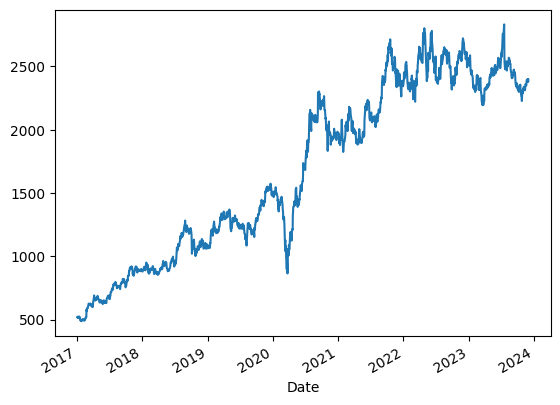

In [23]:
prices.plot()
plt.show()

In [24]:
prices = prices.to_frame()

In [25]:
prices['7_Day_MA'] = (prices['Adj Close'] + prices['Adj Close'].shift(1) + prices['Adj Close'].shift(2) + prices['Adj Close'].shift(3) + prices['Adj Close'].shift(4) + prices['Adj Close'].shift(5) + prices['Adj Close'].shift(6))/7
prices

,Adj Close,7_Day_MA
Date,,
2017-01-02,520.285400,NaN
2017-01-03,522.347107,NaN
2017-01-04,511.678680,NaN
2017-01-05,516.593323,NaN
2017-01-06,515.418640,NaN
...,...,...
2023-11-24,2393.899902,2374.585693
2023-11-28,2394.399902,2379.399972
2023-11-29,2400.699951,2385.849958


Calculating the Beta of the stock and then the expected rate of return and finally the sharpe ratio.

In [29]:
import pandas as pd
import yfinance as yf

tickers = ['RELIANCE.NS', '^NSEI']
data3 = pd.DataFrame()

for t in tickers:
    data = yf.download(t, start='2017-01-01')
    data3[t] = data['Adj Close']

(data3.head())


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,RELIANCE.NS,^NSEI
Date,,
2017-01-02,520.285339,8179.500000
2017-01-03,522.347107,8192.250000
2017-01-04,511.678741,8190.500000
2017-01-05,516.593384,8273.799805
2017-01-06,515.418579,8243.799805


In [30]:
log_rets = np.log(data3/data3.shift(1))
log_rets

,RELIANCE.NS,^NSEI
Date,,
2017-01-02,NaN,NaN
2017-01-03,0.003955,0.001558
2017-01-04,-0.020635,-0.000214
2017-01-05,0.009559,0.010119
2017-01-06,-0.002277,-0.003632
...,...,...
2023-11-24,-0.000668,-0.000369
2023-11-28,0.000209,0.004788
2023-11-29,0.002628,0.010349


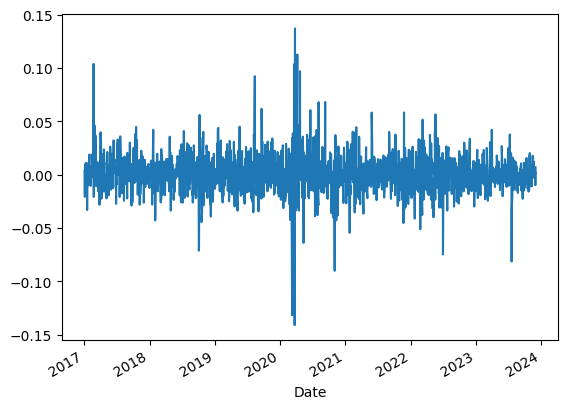

In [31]:
log_rets['RELIANCE.NS'].plot()
plt.show()

On average, the stockmarket opens on 250 days in a year

In [32]:
cov = log_rets.cov()*250
cov

,RELIANCE.NS,^NSEI
RELIANCE.NS,0.085480,0.032859
^NSEI,0.032859,0.029963


In [33]:
cov_with_market = cov.iloc[0,1]
cov_with_market

0.03285869471835982

In [34]:
market_var = log_rets['^NSEI'].var()*250
market_var

0.029963405312364293

In [35]:
rel_beta = cov_with_market/market_var
rel_beta

1.096627515324528

Calculating Free Risk Premium

In [36]:
rfm = log_rets['^NSEI'].mean()*250
rfm

0.1312308309136232

In [37]:
exp_ret = 0.0675 + rel_beta*(rfm - 0.0675)
exp_ret

0.13738898275437422

Sharpe Ratio

In [38]:
sr = (exp_ret - 0.0675)/(log_rets['RELIANCE.NS'].std()*250**0.5)
sr

0.23904383124095455

Monte Carlo Simulation on Reliance Stock

In [39]:
from scipy.stats import norm
rel_mean_d = log_rets['RELIANCE.NS'].mean()
rel_var_d = log_rets['RELIANCE.NS'].var()

#drift = avg daily return + 1/2(Variance)

drift = rel_mean_d + 0.5*rel_var_d
drift

0.0010641533122146716

In [40]:
rel_std = log_rets['RELIANCE.NS'].std()

drift = np.array(drift)
rel_std = np.array(rel_std)

In [41]:
t_interval = 1000
iterations = 10
x = np.random.rand(t_interval, iterations)

daily_returns = np.exp(drift + rel_std*norm.ppf(x))

In [42]:
S0 = data3['RELIANCE.NS'].iloc[-1]
price = np.zeros_like(daily_returns)
price[0] = S0
price

array([[2394.30004883, 2394.30004883, 2394.30004883, ..., 2394.30004883,
        2394.30004883, 2394.30004883],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ]])

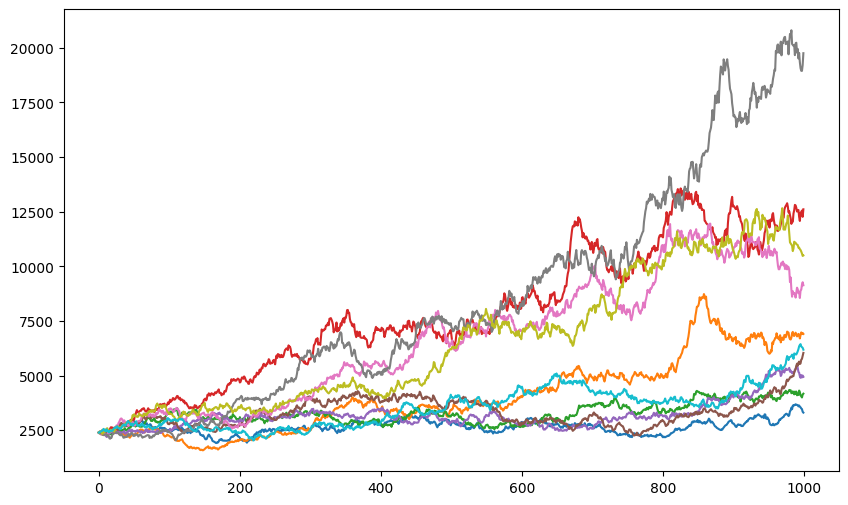

In [43]:
for t in range (1, t_interval):
    price[t] = price[t-1]*daily_returns[t]
    
plt.figure(figsize = (10,6))
plt.plot (price)